In [ ]:
!pip install tensorflow
!pip install keras

## Import required packages

In [ ]:
import os
import pandas as pd
import numpy as np
import PIL
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the annotation CSV file
Annotations = pd.read_csv('annotations.csv')
Annotations.head()

,Image Name,Majority Vote Label,Number of Annotators who Selected SSA (Out of 7),Partition
0,MHIST_aaa.png,SSA,6,train
1,MHIST_aab.png,HP,0,train
2,MHIST_aac.png,SSA,5,train
3,MHIST_aae.png,HP,1,train
4,MHIST_aaf.png,SSA,5,train


In [ ]:
# Check for Imbalanced data
class_counts = Annotations['Majority Vote Label'].value_counts()
print(class_counts)

Majority Vote Label
HP     2162
SSA     990
Name: count, dtype: int64


In [ ]:
# Spliting the test and train data from the dataset file
test_data = Annotations[Annotations['Partition'] == 'test']
train_data = Annotations[Annotations['Partition'] == 'train']

test_data.head()
train_data.shape

(2175, 4)

In [ ]:
#Check for missing values
missing_values = Annotations.isnull().sum()
print(missing_values)

Image Name                                          0
Majority Vote Label                                 0
Number of Annotators who Selected SSA (Out of 7)    0
Partition                                           0
dtype: int64


In [ ]:
# Check for imbalanced data
class_counts = Annotations['Majority Vote Label'].value_counts()
print(class_counts)

Majority Vote Label
HP     2162
SSA     990
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
#unzip the image zip file
!unzip -q images.zip

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import zipfile

# Define paths
base_dir = '/content'
image_dir = '/content/images'  # Directory where original images are located
train_dir1= os.path.join(base_dir, 'train1')
test_dir1 = os.path.join(base_dir, 'test1')

# Create directories for training and testing
os.makedirs(train_dir1, exist_ok=True)
os.makedirs(test_dir1, exist_ok=True)

# Create class directories
for label in ['SSA', 'HP']:
    os.makedirs(os.path.join(train_dir1, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir1, label), exist_ok=True)

# Load and preprocess the data
def split_images(train_data, image_dir, train_dir, test_dir, test_size=0.2):
    from sklearn.model_selection import train_test_split

    # Read and preprocess the CSV file
    label_map = {'SSA': 'SSA', 'HP': 'HP'}
    images = []
    labels = []

    for index, row in train_data.iterrows():
        filename = row['Image Name']
        label = row['Majority Vote Label']
        if label in label_map:
            images.append(filename)
            labels.append(label_map[label])

    images = np.array(images)
    labels = np.array(labels)

    # Split data into training and test sets
    image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size=test_size, stratify=labels, random_state=42)

    # Copy images to their respective folders

    def copy_images(image_list, label_list, target_dir):
        for img, lbl in zip(image_list, label_list):
            src_path = os.path.join(image_dir, img)
            dst_path = os.path.join(target_dir, lbl, img)
            shutil.copy(basic_path, dst_path)

    copy_images(image_train, label_train, train_dir)
    copy_images(image_test, label_test, test_dir)

# Load the data
train_data = pd.read_csv('/content/annotations.csv')  # Update with your data path

# Split and organize images
split_images(train_data, image_dir, train_dir1, test_dir1)

# Function to load images from directories
def load_images_from_directory(directory, target_size=(128, 128)):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    images = images / 255.0  # Normalize images to [0, 1]

    return images, labels

# Load images from the training set
X_train, y_train = load_images_from_directory(train_dir)
X_val, y_val = load_images_from_directory(test_dir)




NameError: name 'basic_path' is not defined

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import zipfile

# Define paths
base_dir = '/content'
image_dir = '/content/images'  # Directory where original images are located
train_dir1= os.path.join(base_dir, 'train1')
test_dir1 = os.path.join(base_dir, 'test1')

# Create directories for training and testing
os.makedirs(train_dir1, exist_ok=True)
os.makedirs(test_dir1, exist_ok=True)

# Create class directories
for label in ['SSA', 'HP']:
    os.makedirs(os.path.join(train_dir1, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir1, label), exist_ok=True)

# Load and preprocess the data
def split_images(train_data, image_dir, train_dir, test_dir, test_size=0.2):
    from sklearn.model_selection import train_test_split

    # Read and preprocess the CSV file
    label_map = {'SSA': 'SSA', 'HP': 'HP'}
    images = []
    labels = []

    for index, row in train_data.iterrows():
        filename = row['Image Name']
        label = row['Majority Vote Label']
        if label in label_map:
            images.append(filename)
            labels.append(label_map[label])

    images = np.array(images)
    labels = np.array(labels)

    # Split data into training and test sets
    image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size=test_size, stratify=labels, random_state=42)

    # Copy images to their respective folders

    def copy_images(image_list, label_list, target_dir):
        for img, lbl in zip(image_list, label_list):
            src_path = os.path.join(image_dir, img)  # Use image_dir to construct the source path
            dst_path = os.path.join(target_dir, lbl, img)
            shutil.copy(src_path, dst_path)  # Copy from source to destination

    copy_images(image_train, label_train, train_dir)
    copy_images(image_test, label_test, test_dir)

# Load the data
train_data = pd.read_csv('/content/annotations.csv')  # Update with your data path

# Split and organize images
split_images(train_data, image_dir, train_dir1, test_dir1)

# Function to load images from directories
def load_images_from_directory(directory, target_size=(128, 128)):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    images = images / 255.0  # Normalize images to [0, 1]

    return images, labels

# Load images from the training set
X_train, y_train = load_images_from_directory(train_dir1)
X_val, y_val = load_images_from_directory(test_dir1)

In [ ]:
#Check the class label count before and after sampling
class_counts_before = Annotations['Majority Vote Label'].value_counts()
print("Class counts before sampling:")
print(class_counts_before)

class_counts_after = pd.Series(y_resampled).value_counts()
print("\nClass counts after sampling:")
print(class_counts_after)

Class counts before sampling:
Majority Vote Label
HP     2162
SSA     990
Name: count, dtype: int64

Class counts after sampling:
0    2162
1    2162
Name: count, dtype: int64


## Build a Convolution Neural Network


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,757,217 (10.52 MB)

 Trainable params: 2,757,153 (10.52 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',


)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create data generators
train_data = train_datagen.flow_from_directory(
    directory=train_dir1,
    target_size=(244, 244),  # Resize images
    batch_size=32,
    class_mode='binary'  # Binary classification
)

# Create data generators for validation data
test_data = val_datagen.flow_from_directory(
    directory=test_dir1,
    target_size=(244, 244),  # Resize images
    batch_size=32,
    class_mode='binary',  # Binary classification
    shuffle=False  # Do not shuffle validation data
)

# Check the output
for X_batch, y_batch in train_data:
    print(f'Batch X shape: {X_batch.shape}')
    print(f'Batch y shape: {y_batch.shape}')
    break  # Remove this break to iterate over more batche

Found 2521 images belonging to 2 classes.
Found 631 images belonging to 2 classes.
Batch X shape: (32, 244, 244, 3)
Batch y shape: (32,)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01, verbose=1, mode='auto')

#model check
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#puttimg call back in a list
call_back = [early_stopping, mc]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Create history of model
hist = model.fit(train_data,
                 validation_data=test_data,  # Use val_data instead of test_data
                 epochs=20,
                 callbacks=call_back,
                 verbose=1)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 36864, but received input with shape (None, 173056)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 244, 244, 3), dtype=float32)
  • training=True
  • mask=None

## Model Evaluation

In [ ]:
h = hist

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plot the accuracy value
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

## Building Predictive System

In [ ]:
path ='/content/images/MHIST_acq.png'
img =image.load_img(path, target_size=(128,128), )

i = image.img_to_array(img)
input_arr = np.array([i])
input_arr = input_arr / 255.0

predictions = model.predict(input_arr)[0][0]

if predictions == 0:
    print('HP')
else:
    print('SSA')

## Save the model to google drive or local

In [ ]:
model.save('/content/drive/MyDrive/model.h5')

In [ ]:
model.save('model.h5')

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

## Pre-Trained Densnet Model

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Ensure these paths point to the correct directories on your filesystem
train_dir = '/content/train1'
val_dir = '/content/test1'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_data = train_datagen.flow_from_directory(
    directory=train_dir1,
    target_size=(224, 224),  # Update to match DenseNet201 input size
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    directory=test_dir1,
    target_size=(224, 224),  # Update to match DenseNet201 input size
    batch_size=32,
    class_mode='binary'
)


Found 2521 images belonging to 2 classes.
Found 631 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201

# Load DenseNet201 with pre-trained ImageNet weights
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
# Add custom layers on top of DenseNet201
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of DenseNet201
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Instantiate EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Stop if val_loss doesn't improve for 3 epochs
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)  # Save the best model based on val_loss

# Train the model
# Train the model
history = model.fit(train_data,
                 validation_data=val_data,  # Use val_data instead of test_data
                 epochs=20,
                 callbacks=[early_stopping, model_checkpoint],
                 verbose=1,
                 steps_per_epoch = 10)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 113s 9s/step - accuracy: 0.5328 - loss: 0.8507 - val_accuracy: 0.6878 - val_loss: 0.5904
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.5966 - loss: 0.6941 - val_accuracy: 0.7258 - val_loss: 0.5257
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.6435 - loss: 0.6825 - val_accuracy: 0.7195 - val_loss: 0.5385
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.6306 - loss: 0.6490 - val_accuracy: 0.7718 - val_loss: 0.4694
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.7249 - loss: 0.5844 - val_accuracy: 0.7718 - val_loss: 0.4649
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.6570 - loss: 0.6559 - val_accuracy: 0.7861 - val_loss: 0.4497
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.7033 - loss: 0.5820 - val_accuracy: 0.7892 - val_loss: 0.4473
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 8s/step - accuracy: 0.7105 - loss: 0.5525 - val_accuracy: 0.7813 - val_loss

In [ ]:
# Save the best model
model.save('densenet_model.keras')

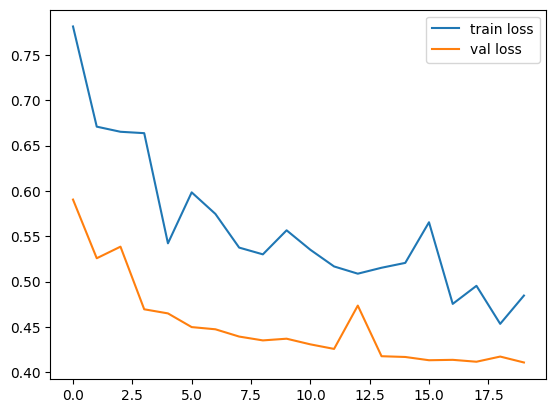

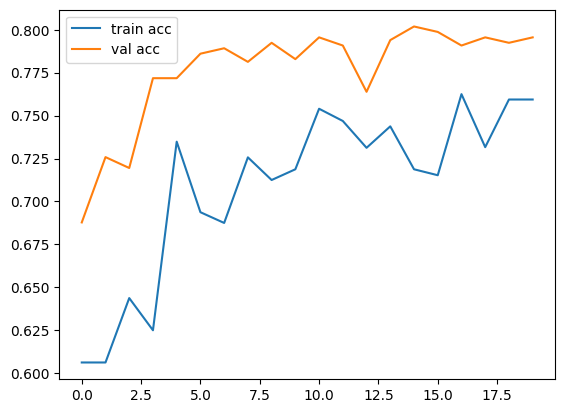

20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.8867 - loss: 0.2886
Test Loss: 0.40910089015960693
Test Accuracy: 0.7939777970314026


In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plot the accuracy value
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


In [ ]:
#load the model
from tensorflow.keras.models import load_model
model_densenet = load_model('/content/densenet_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model_path, img_path):
    """
    Predict the class of an image using the trained model.

    Parameters:
    - model_path: str, path to the saved model file.
    - img_path: str, path to the image file to be predicted.

    Returns:
    - str, predicted class label.
    """

    # Load the pre-trained model
    model = load_model(model_path)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Predict the class
    predictions = model.predict(img_array)

    # Convert prediction to class label
    if predictions[0][0] >= 0.5:
        return 'HP'
    else:
        return 'SSA'

# Example usage
model_path = '/content/densenet_model.h5'  # Path to your saved model
img_path = '/content/images/MHIST_aaj.png'  # Path to the image you want to predict

result = predict_image(model_path, img_path)
print(f'Predicted class: {result}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: SSA


In [ ]:
#Save the model as pickle
import pickle
pickle.dump(model, open('model_densnet.pkl', 'wb'))

In [ ]:
#load pickle model and predict
model = pickle.load(open('model_densnet.pkl', 'rb'))

In [ ]:
# Create prediction system
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model_path, img_path):
    """
    Predict the class of an image using the trained model.

    Parameters:
    - model_path: str, path to the saved model file.
    - img_path: str, path to the image file to be predicted.

    Returns:
    - str, predicted class label.
    """

    #load pickle model and predict
    model = pickle.load(open('model_densnet.pkl', 'rb'))

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Predict the class
    predictions = model.predict(img_array)

    # Convert prediction to class label
    if predictions[0][0] >= 0.5:
        return 'HP'
    else:
        return 'SSA'

# Example usage
model_path = '/content/densenet_model.h5'  # Path to your saved model
img_path = '/content/MHIST_aab.png'  # Path to the image you want to predict

result = predict_image(model, img_path)
print(f'Predicted class: {result}')
